## __勾配累積の仕組みの確認__

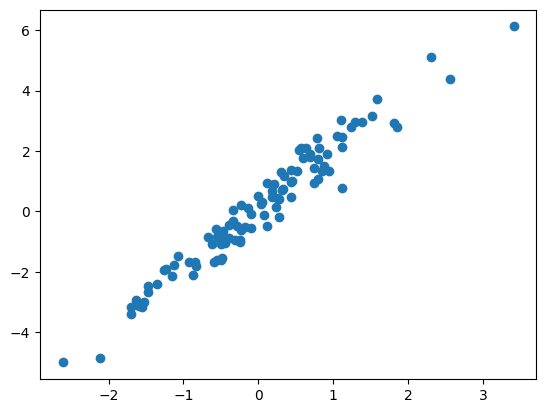

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# モデル
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

        # weightとbiasをそれぞれ0.1, -0.3と指定
        self.linear.weight.data.fill_(0.1)
        self.linear.bias.data.fill_(-0.3)

    def forward(self, x):
        return self.linear(x)

# ダミーデータ
torch.manual_seed(0)
x = torch.randn(100, 1)
y = 2 * x + torch.randn(100, 1) * 0.5

plt.scatter(x.numpy(), y.numpy())
plt.show()

In [2]:
# 勾配累積なしでの単純なパラメータ更新
model1 = LinearRegressionModel()
criterion1 = nn.MSELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

print("パラメータ更新前")
print("weight:", round(model1.linear.weight.item(), 3))
print("bias:  ", round(model1.linear.bias.item(), 3))
print()

# バッチサイズ100
model1.train()
optimizer1.zero_grad()
outputs = model1(x)
loss1 = criterion1(outputs, y)

# 誤差逆伝播
loss1.backward()

# パラメータ更新
optimizer1.step()

print("勾配")
weight_grad = model1.linear.weight.grad.item()
bias_grad = model1.linear.bias.grad.item()
print("weight:", round(weight_grad, 3))
print("bias:  ", round(bias_grad, 3))
print()

print("パラメータ更新後")
print("weight:", round(model1.linear.weight.item(), 3))
print("bias:  ", round(model1.linear.bias.item(), 3))

パラメータ更新前
weight: 0.1
bias:   -0.3

勾配
weight: -3.896
bias:   -0.896

パラメータ更新後
weight: 0.139
bias:   -0.291


パラメータ更新前
weight: 0.1
bias:   -0.3

パラメータ更新後
weight: 0.47
bias:   -0.261



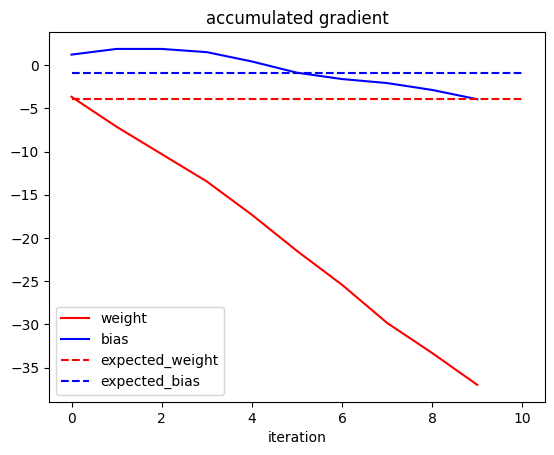

In [3]:
# 勾配累積ありでの学習(lossの割り算なし)
model2 = LinearRegressionModel()
criterion2 = nn.MSELoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)

print("パラメータ更新前")
print("weight:", round(model2.linear.weight.item(), 3))
print("bias:  ", round(model2.linear.bias.item(), 3))
print()

model2.train()
optimizer2.zero_grad()
weight_grad_list, bias_grad_list = [], []
for i in range(10):
    outputs = model2(x[i:i+10])
    loss2 = criterion2(outputs, y[i:i+10])

    # 誤差逆伝播
    loss2.backward()

    # 勾配を記録
    weight_grad_list.append(model2.linear.weight.grad.item())
    bias_grad_list.append(model2.linear.bias.grad.item())

# パラメータ更新
optimizer2.step()

print("パラメータ更新後")
print("weight:", round(model2.linear.weight.item(), 3))
print("bias:  ", round(model2.linear.bias.item(), 3))
print()

plt.plot(weight_grad_list, label='weight', c="r")
plt.plot(bias_grad_list, label='bias', c="b")
plt.hlines(weight_grad, 0, 10, label='expected_weight', colors="r", linestyles="--")
plt.hlines(bias_grad, 0, 10, label='expected_bias', colors="b", linestyles="--")
plt.title("accumulated gradient")
plt.legend()
plt.xlabel("iteration")
plt.show()

パラメータ更新前
weight: 0.1
bias:   -0.3

パラメータ更新後
weight: 0.137
bias:   -0.296



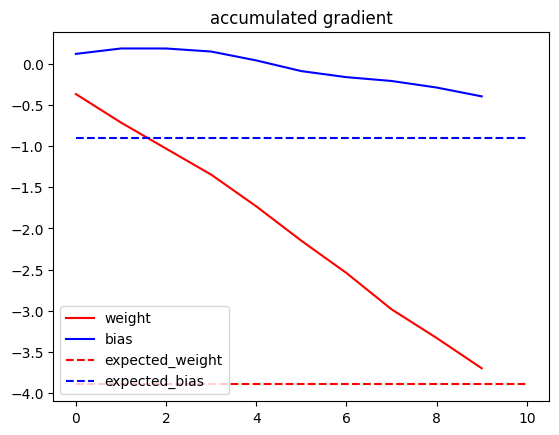

In [4]:
# 勾配累積ありでの学習(lossの割り算あり)
model3 = LinearRegressionModel()
criterion3 = nn.MSELoss()
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)

print("パラメータ更新前")
print("weight:", round(model3.linear.weight.item(), 3))
print("bias:  ", round(model3.linear.bias.item(), 3))
print()

model3.train()
optimizer3.zero_grad()
weight_grad_list, bias_grad_list = [], []
for i in range(10):
    outputs = model3(x[i:i+10])
    loss3 = criterion3(outputs, y[i:i+10])

    # 【重要】lossをaccumulation_stepsで割る
    loss3 /= 10

    # 誤差逆伝播
    loss3.backward()

    # 勾配を記録
    weight_grad_list.append(model3.linear.weight.grad.item())
    bias_grad_list.append(model3.linear.bias.grad.item())

# パラメータ更新
optimizer3.step()

print("パラメータ更新後")
print("weight:", round(model3.linear.weight.item(), 3))
print("bias:  ", round(model3.linear.bias.item(), 3))
print()

plt.plot(weight_grad_list, label='weight', c="r")
plt.plot(bias_grad_list, label='bias', c="b")
plt.hlines(weight_grad, 0, 10, label='expected_weight', colors="r", linestyles="--")
plt.hlines(bias_grad, 0, 10, label='expected_bias', colors="b", linestyles="--")
plt.title("accumulated gradient")
plt.legend()
plt.show()

__勾配累積時はlossをaccumulation_stepsで割る必要がある__